In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-02-28 23:00:00,5.0,6.0
2019-02-28 22:00:00,4.0,27.0
2019-02-28 21:00:00,16.0,32.0
2019-02-28 20:00:00,16.0,50.0
2019-02-28 19:00:00,39.0,59.0


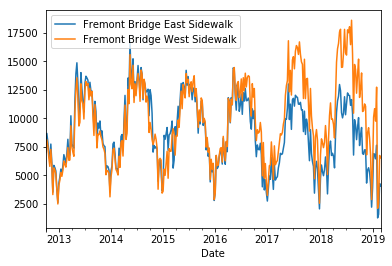

In [8]:
%matplotlib inline
data.resample('W').sum().plot()

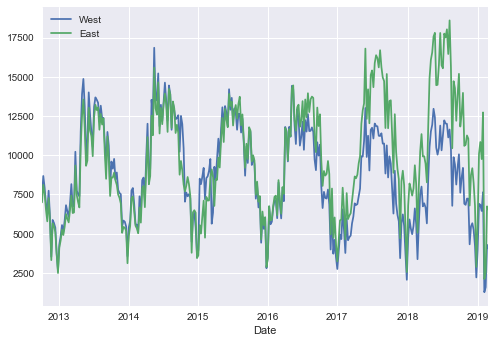

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ('West', 'East')
data.resample('W').sum().plot()

(0, 1100992.6)

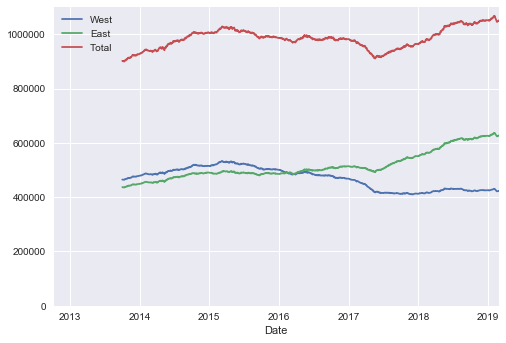

In [14]:
data['Total'] = data ['East'] + data ['West']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

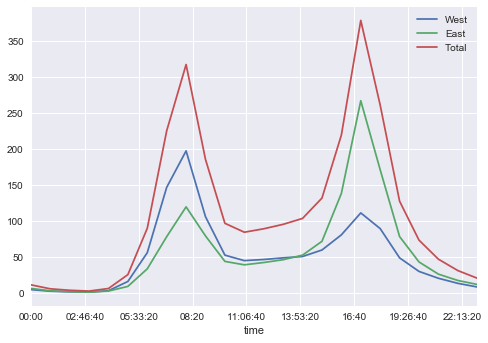

In [15]:
data.groupby(data.index.time).mean().plot()

In [17]:
pivoted = data.pivot_table('Total', index=data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


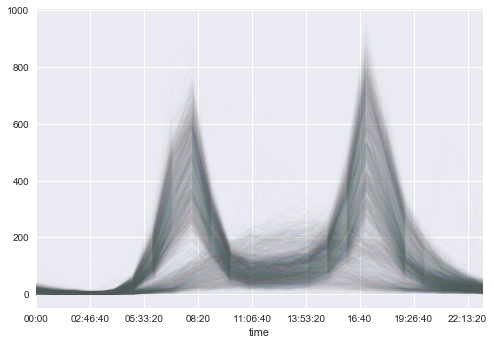

In [19]:
pivoted.plot(legend=False, alpha=0.01)